In [2]:
import pandas as pd
pd.set_option('display.max_rows', 50)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

## 1.1 Loading dataset and having a first look

In [3]:
df = pd.read_csv('dataset.csv', sep = ';')
df.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [4]:
# Removing uuid as ID does not impact prediction and could induce noise
df = df.drop(columns= 'uuid')

In [5]:
df.shape

(99976, 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   default                              89976 non-null  float64
 1   account_amount_added_12_24m          99976 non-null  int64  
 2   account_days_in_dc_12_24m            88140 non-null  float64
 3   account_days_in_rem_12_24m           88140 non-null  float64
 4   account_days_in_term_12_24m          88140 non-null  float64
 5   account_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 6   account_status                       45603 non-null  float64
 7   account_worst_status_0_3m            45603 non-null  float64
 8   account_worst_status_12_24m          33215 non-null  float64
 9   account_worst_status_3_6m            42274 non-null  float64
 10  account_worst_status_6_12m           39626 non-null  float64
 11  age                         

In [7]:
# Reassign rows with no default values and remove the rows in the dataframe
X_pred = df.loc[df['default'].isnull()]
df = df.loc[df['default'].notnull()]
df.shape

(89976, 42)

## 1.2 Identifying null values

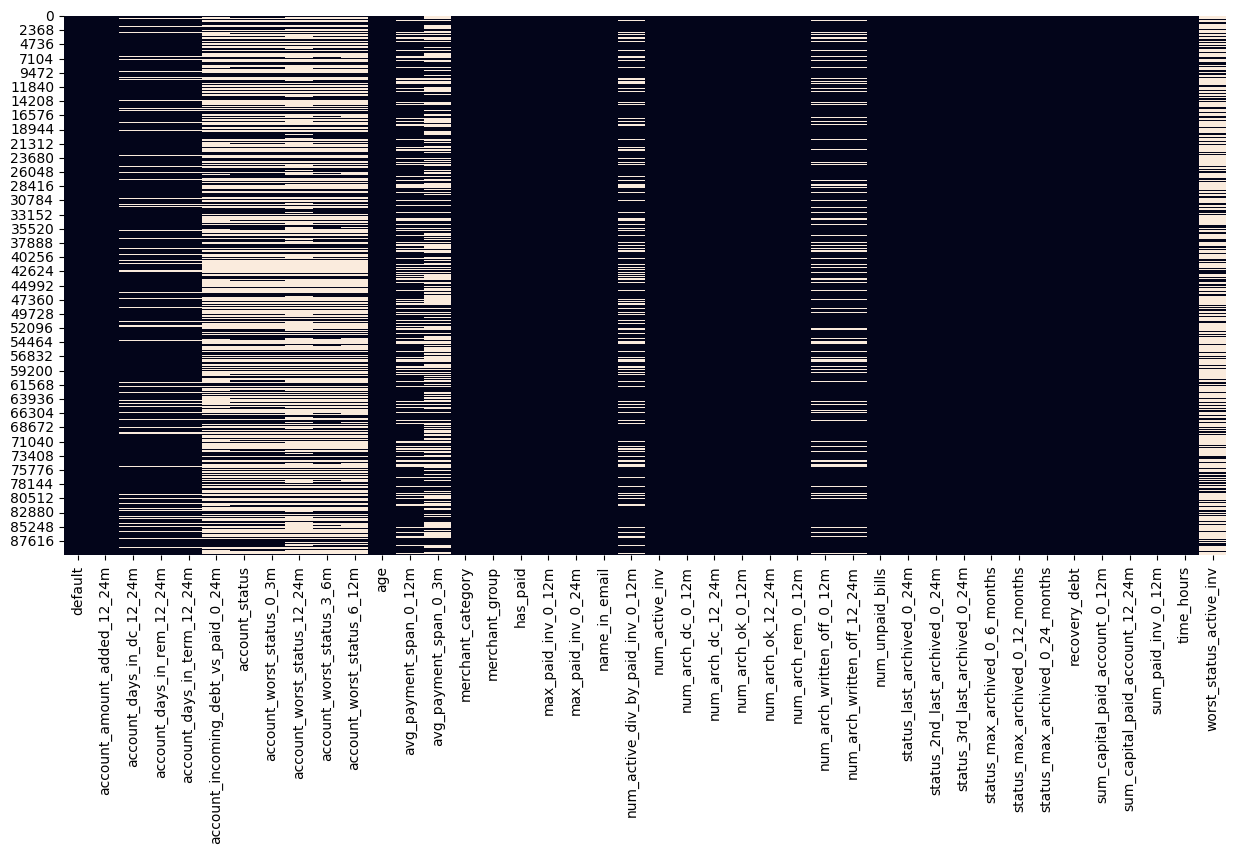

In [8]:
# Visualizing distribution of null values to decide whether to delete rows or columns
plt.figure(figsize = (15,7))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [9]:
# Percentage of null values per column

null_count = df.isna().sum()/df.shape[0]
null_count.sort_values(ascending=False)

worst_status_active_inv                0.695074
account_worst_status_12_24m            0.667456
account_worst_status_6_12m             0.603639
account_incoming_debt_vs_paid_0_24m    0.593014
account_worst_status_3_6m              0.577243
account_worst_status_0_3m              0.543856
account_status                         0.543856
avg_payment_span_0_3m                  0.493265
avg_payment_span_0_12m                 0.238597
num_active_div_by_paid_inv_0_12m       0.229595
num_arch_written_off_12_24m            0.181215
num_arch_written_off_0_12m             0.181215
account_days_in_rem_12_24m             0.118732
account_days_in_term_12_24m            0.118732
account_days_in_dc_12_24m              0.118732
sum_paid_inv_0_12m                     0.000000
sum_capital_paid_account_12_24m        0.000000
sum_capital_paid_account_0_12m         0.000000
time_hours                             0.000000
status_max_archived_0_24_months        0.000000
status_max_archived_0_12_months        0

In [10]:
# Identifying columns with null values to decide whether to fill in the values or delete the columns
null_cols = null_count.loc[null_count > 0.1]
null_cols

account_days_in_dc_12_24m              0.118732
account_days_in_rem_12_24m             0.118732
account_days_in_term_12_24m            0.118732
account_incoming_debt_vs_paid_0_24m    0.593014
account_status                         0.543856
account_worst_status_0_3m              0.543856
account_worst_status_12_24m            0.667456
account_worst_status_3_6m              0.577243
account_worst_status_6_12m             0.603639
avg_payment_span_0_12m                 0.238597
avg_payment_span_0_3m                  0.493265
num_active_div_by_paid_inv_0_12m       0.229595
num_arch_written_off_0_12m             0.181215
num_arch_written_off_12_24m            0.181215
worst_status_active_inv                0.695074
dtype: float64

In [11]:
# Printing unique values of the selected columns to see whether the null values are omitted values or empty values
for col in null_cols.index:
    print(f'Null values in "{col}" \n {df[col].unique()}')

Null values in "account_days_in_dc_12_24m" 
 [  0.  nan   9.  63. 131.  56.  19. 291. 362.  57. 238.  36.  86.  39.
  62. 134.  85.  42.  54.  67.   3.  99.  59.  46.  81.  35.  44. 158.
  43.  41.  31. 233.  55. 145. 276.  58.  65.  28.  10.  33.  11. 112.
  12.  64.  48. 150. 143.   7.  29.  22. 116.  77. 127. 258.  21.   4.
 147. 125. 121.  66.  18.  84. 316.  95.  30.  14.  25.  75. 119.  74.
  92. 163.  32. 289. 229.  34.   1. 159. 129. 350.  73.  82. 105.  69.
 135. 106. 203.  13.  20. 271. 318. 110.  52.  23. 322. 269.  91. 152.
  17. 133. 165.   5.  60.  71. 115. 228.  90. 153. 113.  45.  72.  26.
  87.  50. 100. 128.  38. 118.  47. 191.]
Null values in "account_days_in_rem_12_24m" 
 [  0.  nan 142.  47.  26.  24.  21.  29.  16. 110.  15.   1.  53. 165.
  96.   9.  48.  27.   5.   3.  14. 365.  19.   2.  28.   4.  85.  20.
  93.  34.  92. 155. 177.  13.  23.  50.  42.  84.  17.  79.  46.  25.
  44.  40.  38. 122.  76.  54.  66.   6.  33.  72.  36. 193. 130.  58.
  88.  89. 224.

In [12]:
# Dropping all columns with null value, as it is difficult to discern which columns are worth keeping

df_clean = df.dropna(axis = 1)
df_clean.shape

(89976, 27)

## 1.3 A glimpse at the distribution of values

In [23]:
# Identifying categorical columns for transformation
cat_cols = list(df_clean.select_dtypes(include=['object']).columns)
cat_cols


['merchant_category', 'merchant_group', 'name_in_email']

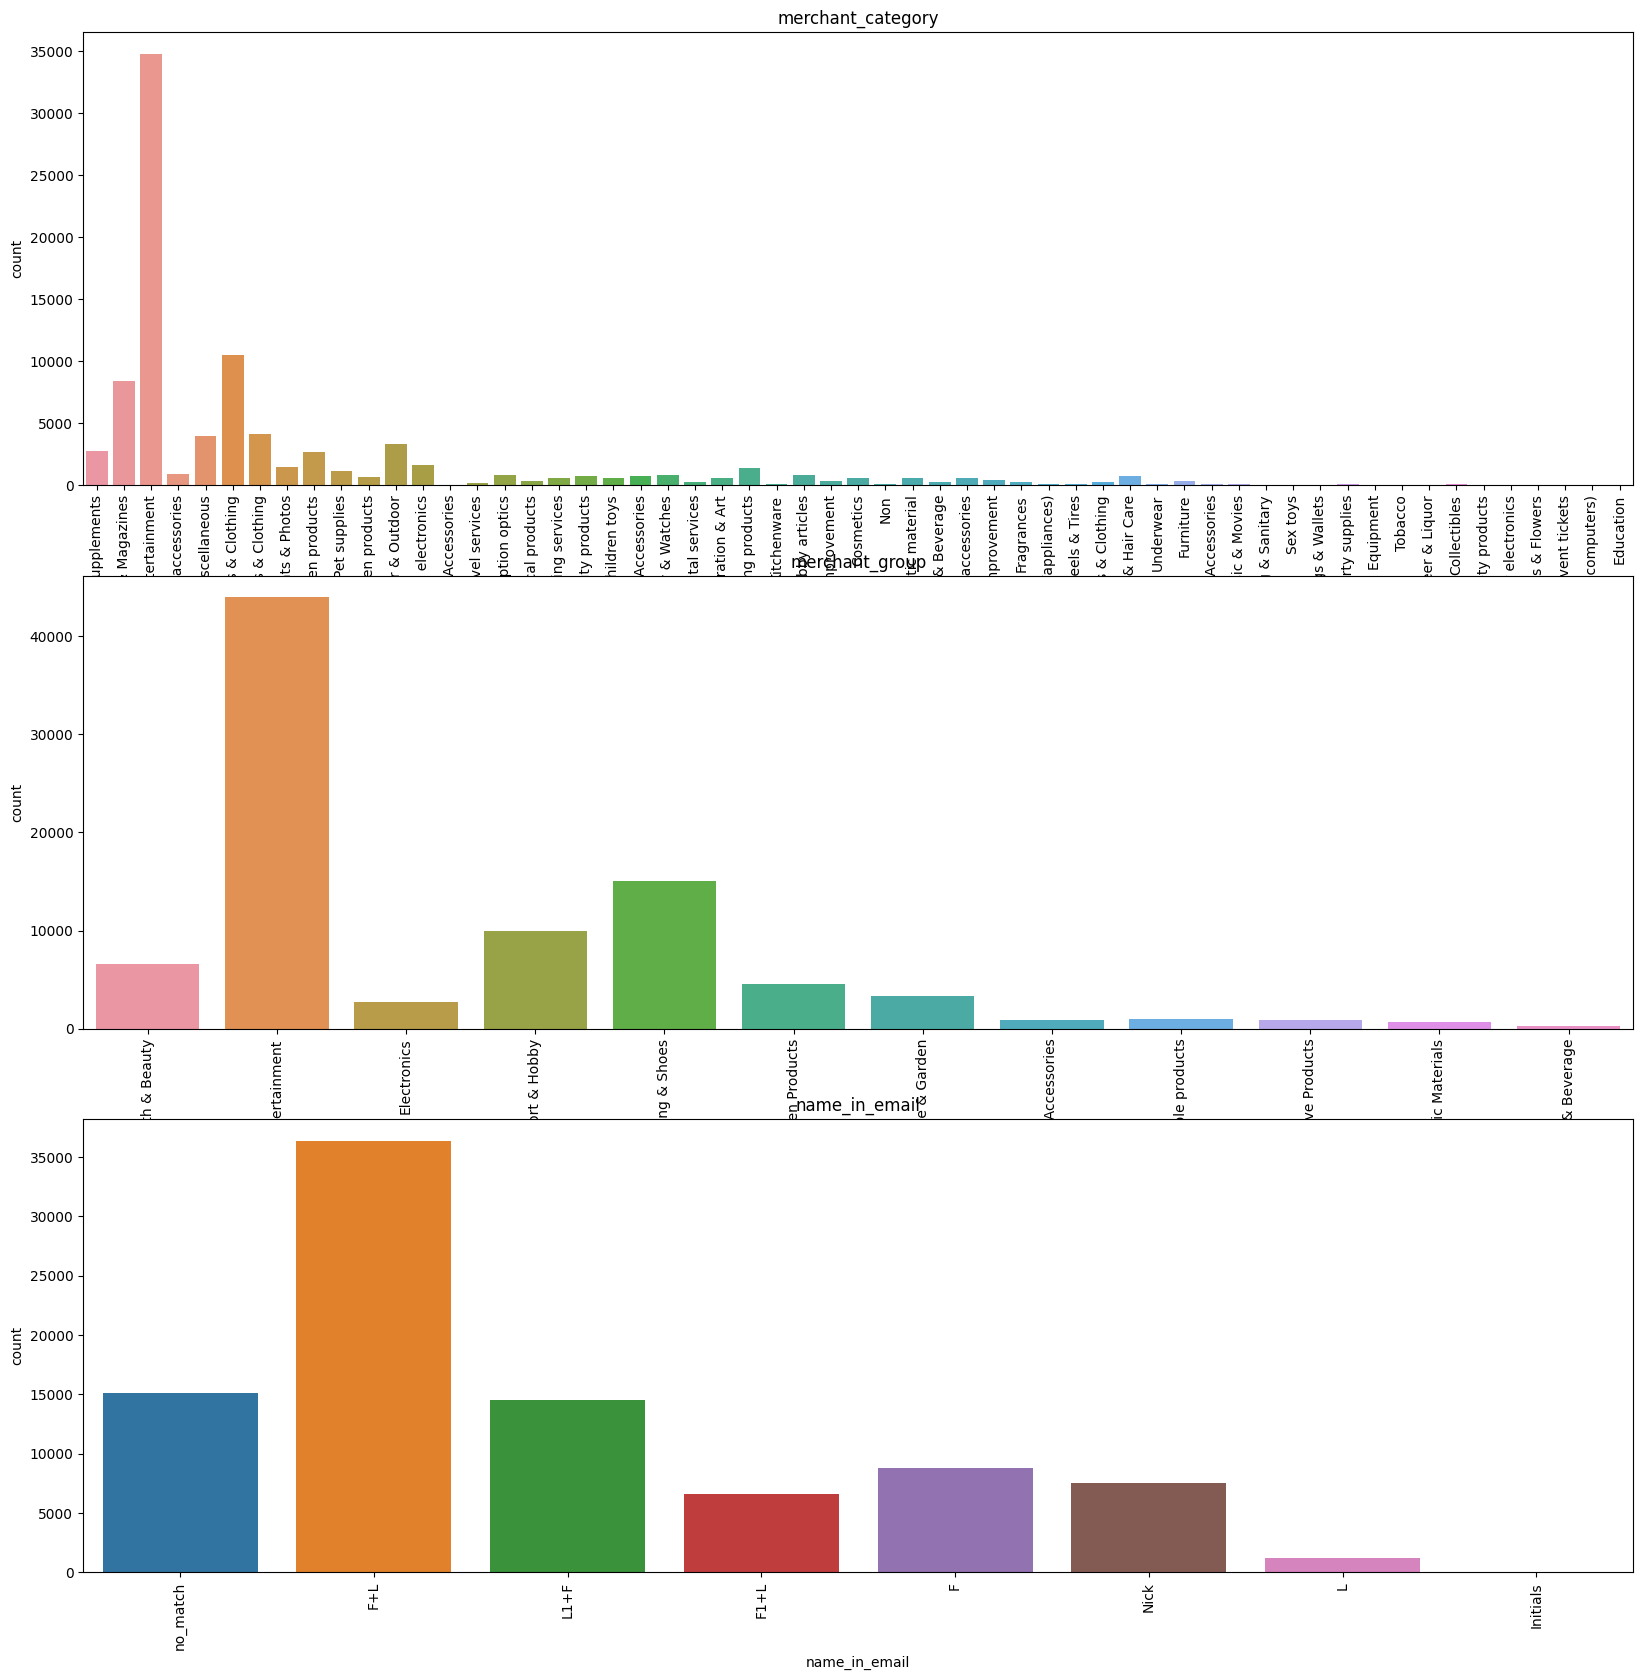

In [42]:
plt.figure(figsize = (20,20))
for ind, col in enumerate(cat_cols):
    plt.subplot(3,1,ind+1)
    sns.countplot(data = df_clean, x = col)
    plt.xticks(rotation = 90)
    plt.title(col)
plt.show()

In [58]:
df_clean['has_paid'] = df_clean['has_paid'].apply(lambda x: 1 if x == 'True' else 0)

/tmp/ipykernel_84430/995191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['has_paid'] = df_clean['has_paid'].apply(lambda x: 1 if x == 'True' else 0)


In [51]:
# Identifying numerical columns for transformation
num_cols = list(df_clean.select_dtypes(exclude=['object']).columns)
num_cols.remove('default')
len(num_cols)

23

In [55]:
df_clean[num_cols].isna().sum()

account_amount_added_12_24m        0
age                                0
has_paid                           0
max_paid_inv_0_12m                 0
max_paid_inv_0_24m                 0
num_active_inv                     0
num_arch_dc_0_12m                  0
num_arch_dc_12_24m                 0
num_arch_ok_0_12m                  0
num_arch_ok_12_24m                 0
num_arch_rem_0_12m                 0
num_unpaid_bills                   0
status_last_archived_0_24m         0
status_2nd_last_archived_0_24m     0
status_3rd_last_archived_0_24m     0
status_max_archived_0_6_months     0
status_max_archived_0_12_months    0
status_max_archived_0_24_months    0
recovery_debt                      0
sum_capital_paid_account_0_12m     0
sum_capital_paid_account_12_24m    0
sum_paid_inv_0_12m                 0
time_hours                         0
dtype: int64

<AxesSubplot:>

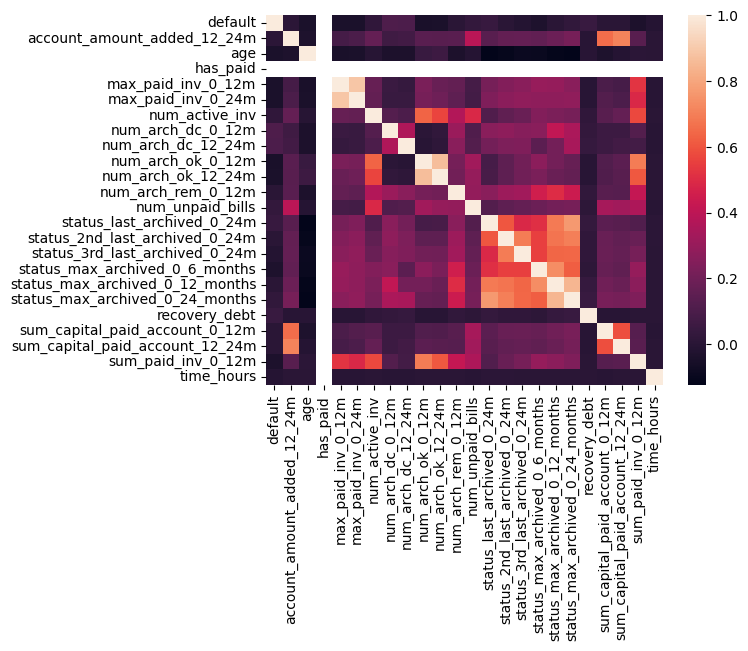

In [63]:
sns.heatmap(df_clean.corr())

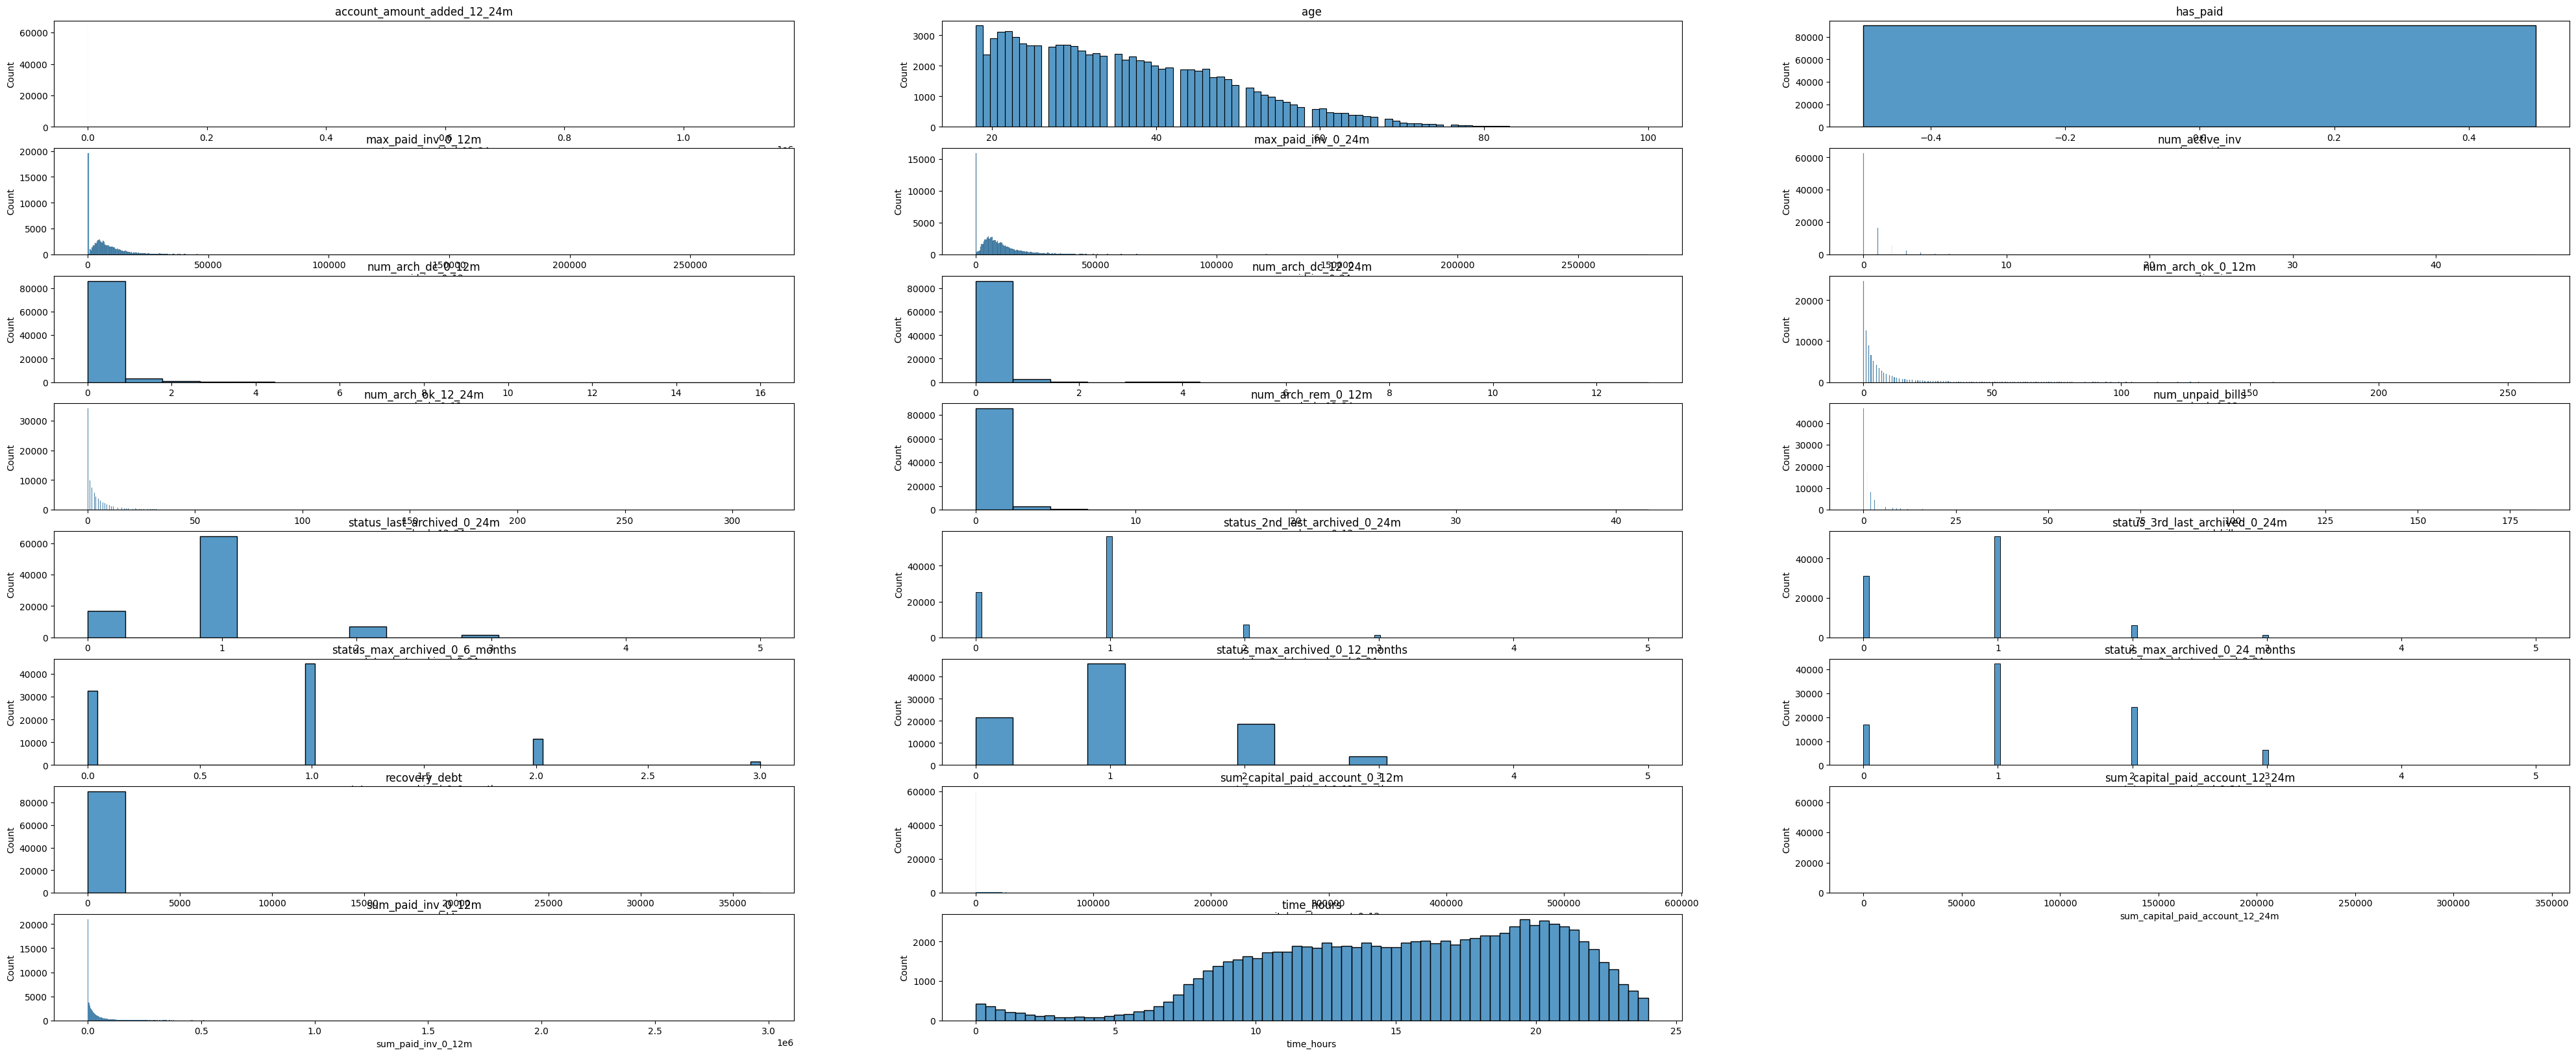

In [60]:
plt.figure(figsize = (50,20))
for ind, col in enumerate(num_cols):
    plt.subplot(8,3,ind+1)
    sns.histplot(data = df_clean, x = col)
    plt.title(col)
plt.show()

# 2. Splitting dataset and working on training dataset

In [64]:
X = df_clean[num_cols]
y = df['default']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = .2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2, random_state=2)
print(f'Train dataset : {y_train.shape} / Test dataset : {y_test.shape}, Val dataset : {y_val.shape}')

Train dataset : (57584,) / Test dataset : (14396,), Val dataset : (17996,)


In [66]:
from sklearn.linear_model import SGDClassifier
svc = SGDClassifier(loss = 'hinge', verbose = 1, early_stopping=True)

svc.fit(X_train,y_train)


-- Epoch 1
Norm: 41159.71, NNZs: 22, Bias: -5.129230, T: 51825, Avg. loss: 51156094.349787
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 8497.42, NNZs: 22, Bias: -1.759178, T: 103650, Avg. loss: 7474710.192873
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 23767.05, NNZs: 22, Bias: 0.186817, T: 155475, Avg. loss: 4958902.661038
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 12480.93, NNZs: 22, Bias: 1.805491, T: 207300, Avg. loss: 2992936.746444
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 5698.08, NNZs: 22, Bias: 3.117062, T: 259125, Avg. loss: 2702907.163554
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 4575.14, NNZs: 22, Bias: 3.013940, T: 310950, Avg. loss: 2161524.466757
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 6021.12, NNZs: 22, Bias: 4.477485, T: 362775, Avg. loss: 3836714.755639
Total training time: 0.26 seconds.
-- Epoch 8
Norm: 2934.98, NNZs: 22, Bias: 4.897117, T: 414600, Avg. loss: 1408463.815464
Total training time: 0.30 seconds.
Con

SGDClassifier(early_stopping=True, verbose=1)

In [67]:
svc.score(X_val, y_val)

0.9844409868859747

In [69]:
svc.predict(X_pred[num_cols])

array([0., 0., 0., ..., 0., 0., 0.])